# 1) Roades in Belgium

/var/folders/gg/310fvqtd11b4y8w35p5bpf7m0000gn/T/ipykernel_21027/3549021800.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 1441295 nodes and 1549971 edges


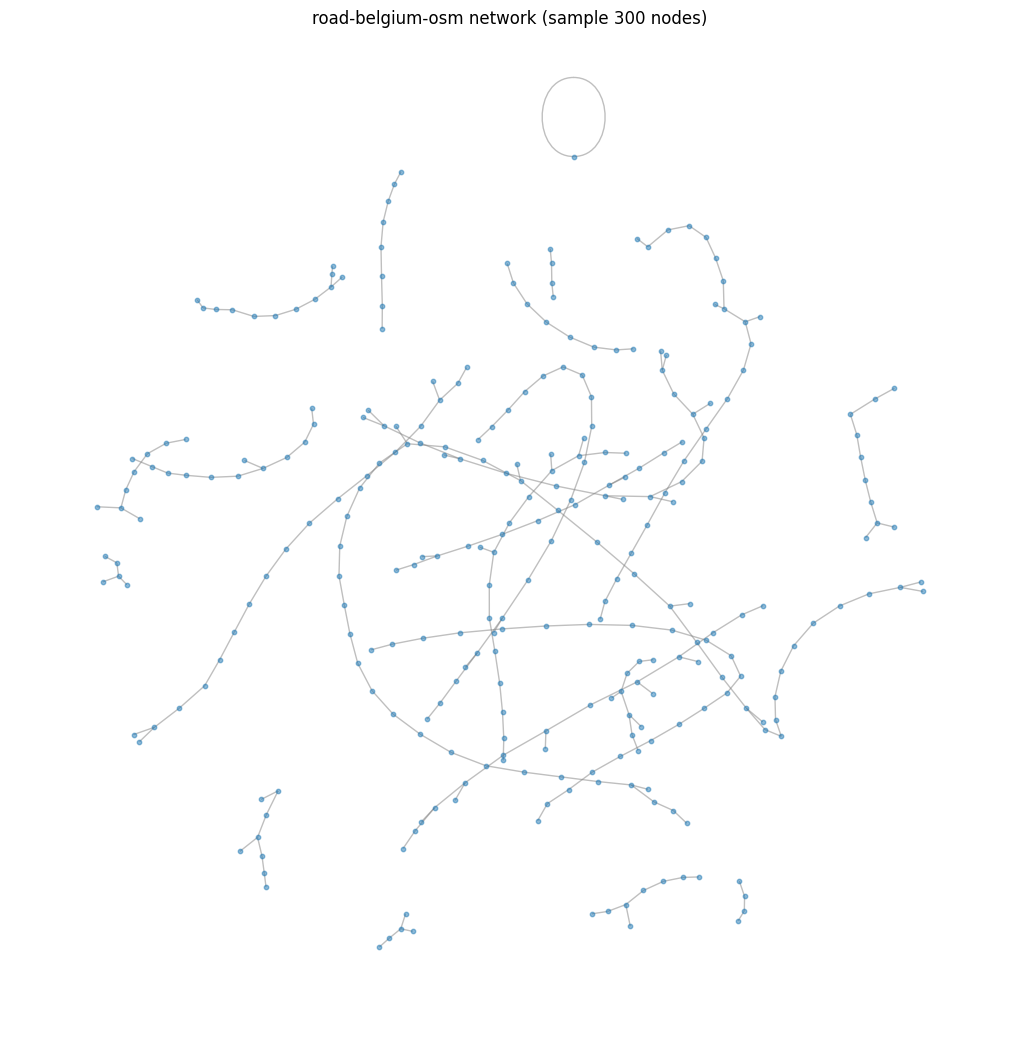

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Read only first two columns of each line
edges = []
with open("./road-belgium-osm/road-belgium-osm.mtx") as f:
    for line in f:
        if line.startswith('%') or not line.strip():
            continue
        parts = line.split()
        if len(parts) >= 2:
            src, dst = int(parts[0]), int(parts[1])
            edges.append((src, dst))

G = nx.Graph()
G.add_edges_from(edges)

print(nx.info(G))

# Draw a small subset
H = G.subgraph(list(G.nodes())[:300])
plt.figure(figsize=(10, 10))
nx.draw(H, node_size=10, edge_color="gray", alpha=0.5)
plt.title("road-belgium-osm network (sample 300 nodes)")
plt.show()


print(nx.info(G))
print("Number of connected components:", nx.number_connected_components(G))

In [9]:
print(nx.info(G))
print("Number of connected components:", nx.number_connected_components(G))


/var/folders/gg/310fvqtd11b4y8w35p5bpf7m0000gn/T/ipykernel_21027/2402253974.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 1441295 nodes and 1549971 edges
Number of connected components: 1


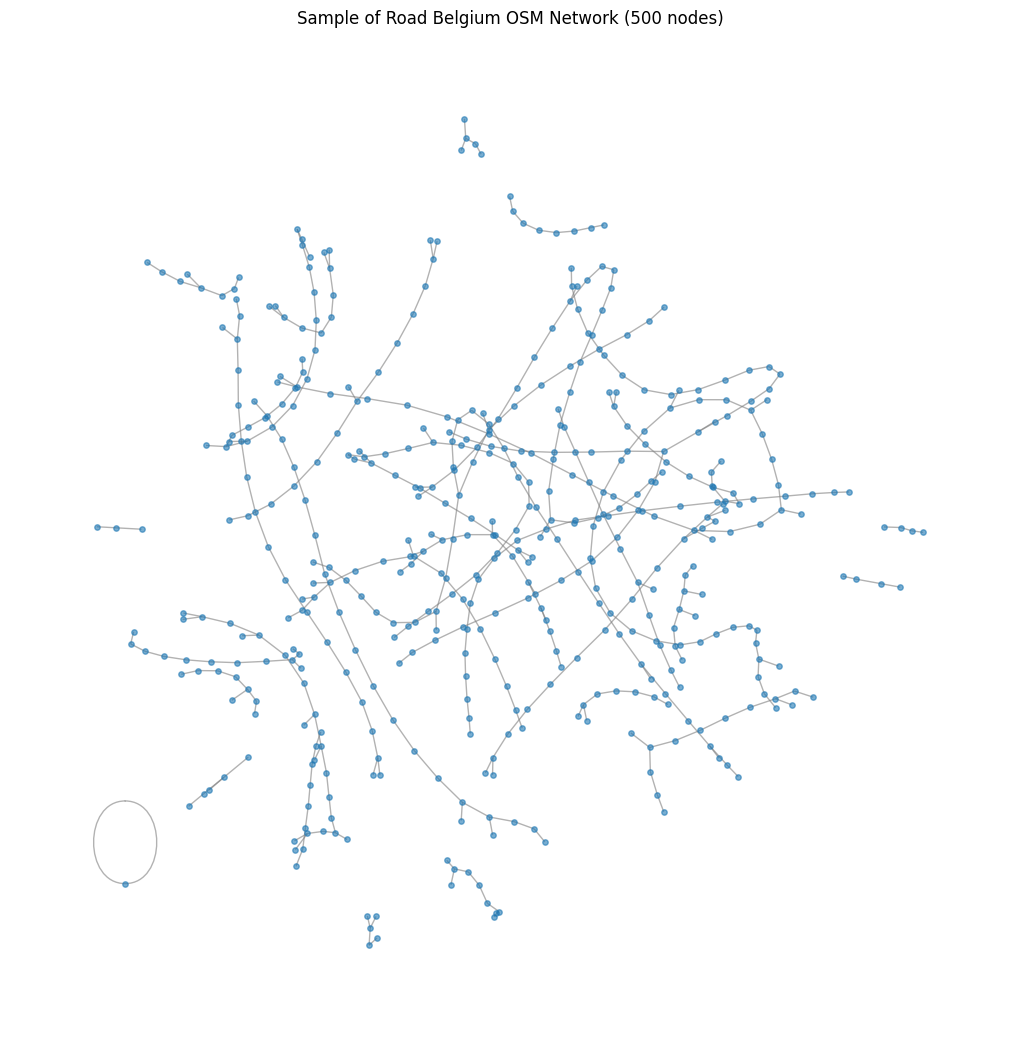

In [10]:
H = G.subgraph(list(G.nodes())[:500])
plt.figure(figsize=(10,10))
nx.draw(H, node_size=15, edge_color="gray", alpha=0.6)
plt.title("Sample of Road Belgium OSM Network (500 nodes)")
plt.show()


# 2) Swallow

/var/folders/gg/310fvqtd11b4y8w35p5bpf7m0000gn/T/ipykernel_21027/2605768947.py:19: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 17 nodes and 53 edges


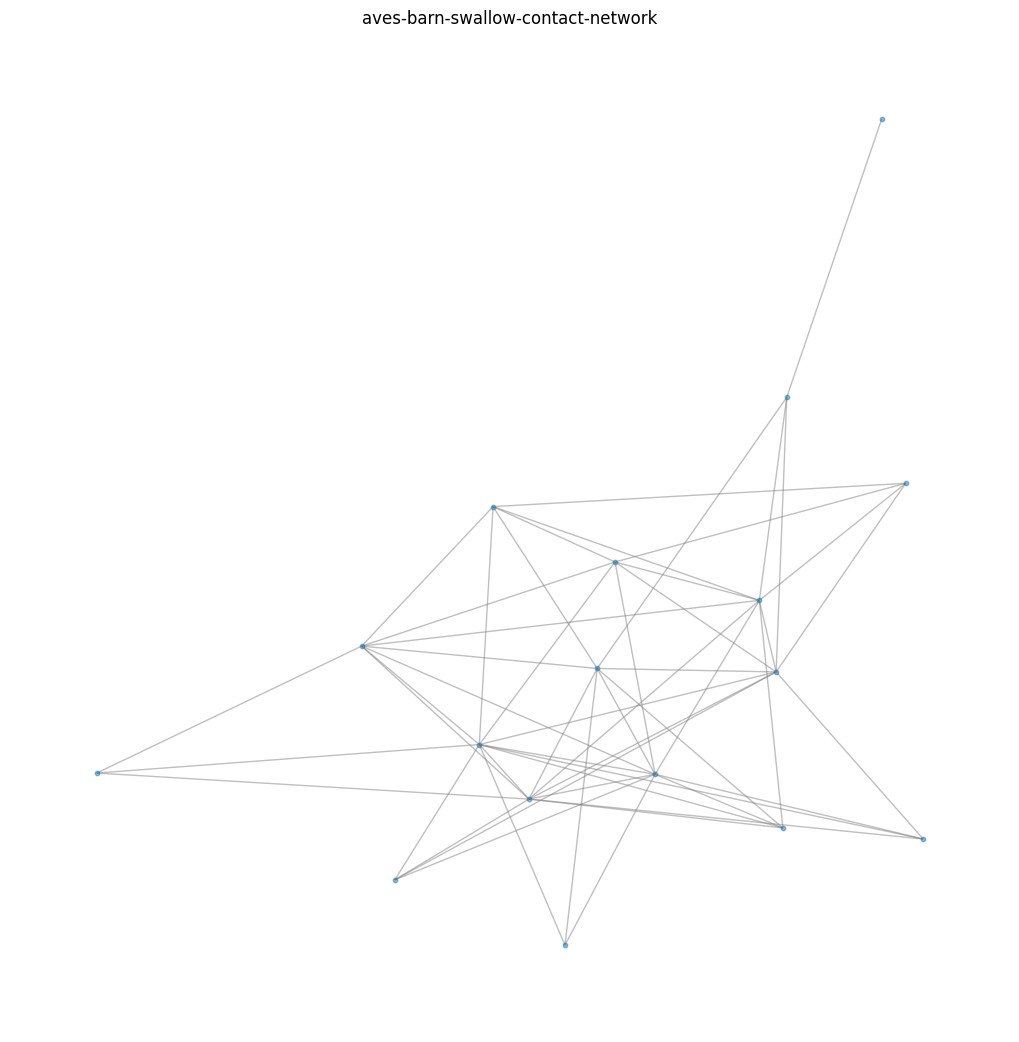

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Wczytanie pliku, ignorujemy komentarze (jeśli są)
edges = []
with open("./aves-barn-swallow-contact-network/aves-barn-swallow-contact-network.edges") as f:
    for line in f:
        if line.startswith("#") or not line.strip():
            continue
        parts = line.split()
        if len(parts) >= 2:
            src, dst = int(parts[0]), int(parts[1])
            edges.append((src, dst))

# Tworzymy graf nieskierowany (kontakty są obustronne)
G = nx.Graph()
G.add_edges_from(edges)

print(nx.info(G))

# Draw a small subset
H = G.subgraph(list(G.nodes())[:300])
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10, edge_color="gray", alpha=0.5)
plt.title("aves-barn-swallow-contact-network")
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

# Wczytanie danych z pliku CSV (np. 'stormofswords.csv')
# Oczekiwany format: Source,Target,Weight (z nagłówkiem)
edges = []
with open("./stormofswords/stormofswords.csv") as f:
    reader = csv.reader(f)
    next(reader)  # Pomiń linię nagłówka (Source,Target,Weight)
    for row in reader:
        if row:  # Upewnij się, że linia nie jest pusta
            src, dst = row[0], row[1]
            edges.append((src, dst))

G = nx.Graph()
G.add_edges_from(edges)

# Usunięcie izolowanych węzłów (postaci bez interakcji)
G.remove_nodes_from(list(nx.isolates(G)))

print("--- Network of Thrones ---")
print(nx.info(G))

# Rysowanie sieci społecznej
plt.figure(figsize=(14, 14))
# Używamy układu 'spring_layout' do wizualizacji sieci społecznych
pos = nx.spring_layout(G, k=0.15, iterations=20, seed=42)

nx.draw(G, pos, 
        with_labels=True, 
        node_size=80, 
        font_size=9, 
        font_weight="bold",
        edge_color="#cccccc",
        alpha=0.8)

plt.title("Sieć interakcji postaci (Network of Thrones)")
plt.show()

# 3) Game of Thrones

Wczytuję plik: got-book1.csv
--- Informacje o sieci ---


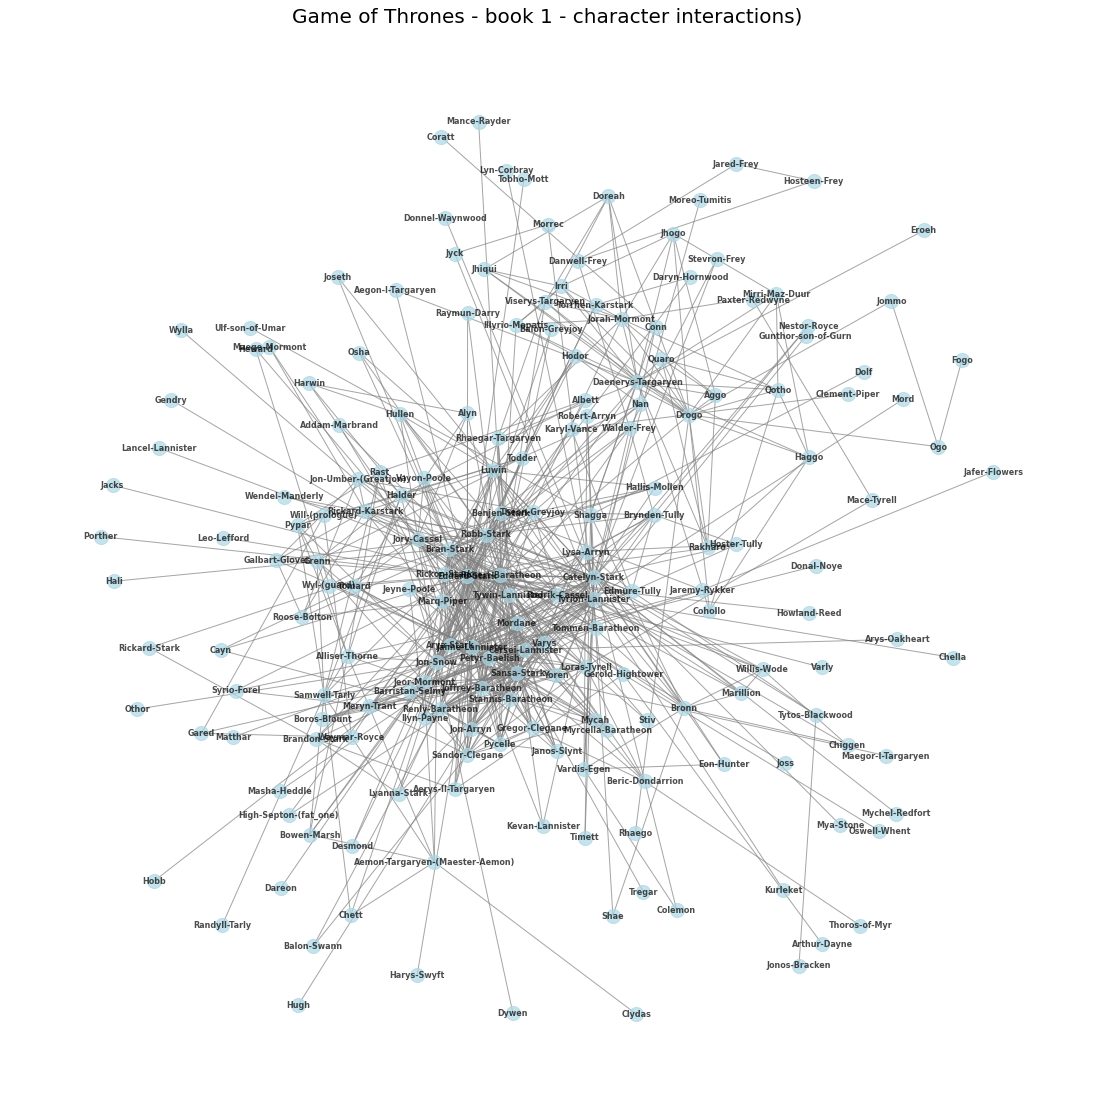

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import csv  # Importujemy bibliotekę do obsługi plików CSV

# Nazwa pliku, który pobrałeś i zapisałeś w tym samym katalogu
NAZWA_PLIKU = "got-book1.csv"

print(f"Wczytuję plik: {NAZWA_PLIKU}")

# Lista do przechowywania krawędzi
edges = []

try:
    with open(NAZWA_PLIKU, 'r', encoding='utf-8') as f:
        # Używamy csv.reader do wczytania pliku
        reader = csv.reader(f)
        
        # Pomijamy pierwszą linię (nagłówek: "Source,Target,Weight")
        next(reader)
        for row in reader:
            if row:  # Upewniamy się, że linia nie jest pusta
                src = row[0]
                dst = row[1]
                edges.append((src, dst))

    # Tworzymy graf nieskierowany
    G = nx.Graph()
    G.add_edges_from(edges)

    print("--- Informacje o sieci ---")

    # --- Rysowanie sieci ---
    plt.figure(figsize=(15, 15)) 
    pos = nx.spring_layout(G, k=0.3, iterations=30, seed=42)

    nx.draw(G, pos,
            with_labels=True,  # Pokaż etykiety (imiona postaci)
            node_color='lightblue',
            node_size=200,
            font_size=8,
            font_weight='bold',
            edge_color='gray',
            alpha=0.7
           )

    plt.title("Game of Thrones - book 1 - character interactions)", size=20)
    plt.axis('off')  # Wyłącz osie
    plt.show()

except FileNotFoundError:
    print(f"error: not a file")

Wczytuję plik: got-book1.csv

--- Informacje o sieci TOP 20 ---
Wybrane postacie: ['Renly-Baratheon', 'Jaime-Lannister', 'Drogo', 'Rodrik-Cassel', 'Tyrion-Lannister', 'Tywin-Lannister', 'Joffrey-Baratheon', 'Cersei-Lannister', 'Jon-Snow', 'Arya-Stark', 'Robert-Baratheon', 'Robb-Stark', 'Bran-Stark', 'Daenerys-Targaryen', 'Catelyn-Stark', 'Petyr-Baelish', 'Jory-Cassel', 'Eddard-Stark', 'Luwin', 'Sansa-Stark']


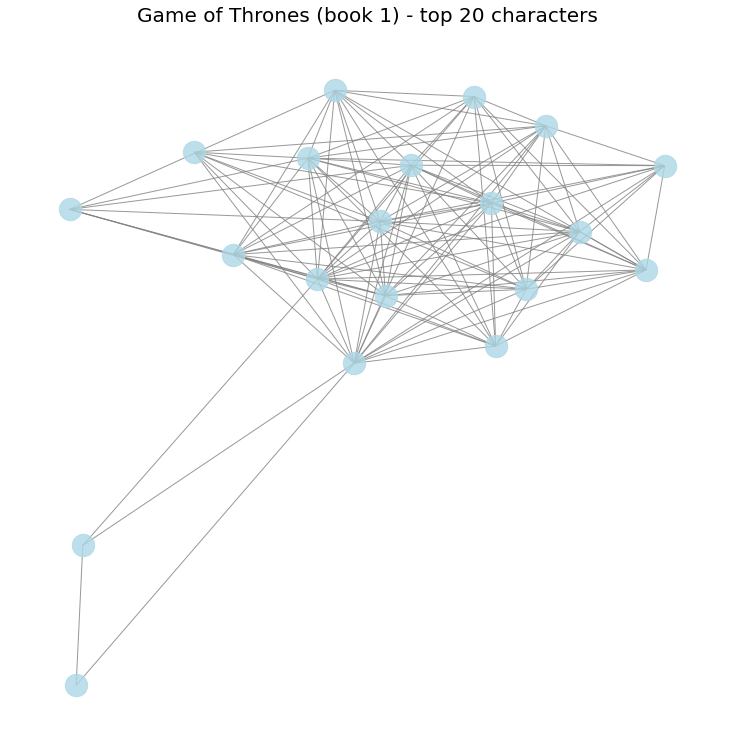

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import csv  

NAZWA_PLIKU = "got-book1.csv"

print(f"Wczytuję plik: {NAZWA_PLIKU}")
edges = []

try:
    with open(NAZWA_PLIKU, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        
        # Pomijamy pierwszą linię (nagłówek: "Source,Target,Weight")
        next(reader)
        for row in reader:
            if row:  # Upewniamy się, że linia nie jest pusta
                src = row[0]
                dst = row[1]
                edges.append((src, dst))

    # Tworzymy pełny graf nieskierowany
    G = nx.Graph()
    G.add_edges_from(edges)

    # -----------------------------------------------------------------
    #  NOWA SEKCJA: Filtrowanie - ograniczenie do 20 najważniejszych postaci
    # -----------------------------------------------------------------
    node_degrees = dict(G.degree())
    
    sorted_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)
    top_20_nodes = sorted_nodes[:20]
    
    # 4. Tworzymy nowy graf 'H' (podgraf), który zawiera TYLKO te 20 wybranych postaci i krawędzie MIĘDZY nimi.
    H = G.subgraph(top_20_nodes)
    
    print("\n--- Informacje o sieci TOP 20 ---")
    print(f"Wybrane postacie: {list(H.nodes())}")
    
    plt.figure(figsize=(10, 10)) 
    
    pos = nx.spring_layout(H, k=0.4, iterations=40, seed=42)

    # Rysujemy 'H'
    nx.draw(H, pos,
            with_labels=False,  # Pokaż etykiety (imiona postaci)
            node_color='lightblue',
            node_size=500,     # Zwiększamy rozmiar węzłów dla czytelności
            font_size=10,
            font_weight='bold',
            edge_color='gray',
            alpha=0.8
           )

    plt.title("Game of Thrones (book 1) - top 20 characters", size=20)
    plt.axis('off')  # Wyłącz osie
    plt.show()

except FileNotFoundError:
    print(f"BŁĄD: Nie znaleziono pliku '{NAZWA_PLIKU}'!")
    print("Upewnij się, że plik znajduje się w tym samym folderze co skrypt.")

# Les Misérables, Wiktor Hugo Theatre

Wczytuję plik: got-book1.csv

--- Informacje o sieci TOP 20 ---
Wybrane postacie: ['Jaime-Lannister', 'Tywin-Lannister', 'Daenerys-Targaryen', 'Eddard-Stark', 'Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Jeor-Mormont', 'Jon-Snow', 'Samwell-Tarly', 'Aerys-II-Targaryen', 'Brandon-Stark', 'Gerold-Hightower', 'Jon-Arryn', 'Robert-Baratheon', 'Aggo', 'Drogo', 'Jhogo', 'Jorah-Mormont', 'Quaro', 'Rakharo', 'Albett', 'Halder', 'Rast', 'Grenn', 'Pypar', 'Tyrion-Lannister', 'Alyn', 'Harwin', 'Jory-Cassel', 'Tomard', 'Arya-Stark', 'Benjen-Stark', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Ilyn-Payne', 'Jeyne-Poole', 'Joffrey-Baratheon', 'Meryn-Trant', 'Mordane', 'Mycah', 'Myrcella-Baratheon', 'Petyr-Baelish', 'Rickon-Stark', 'Robb-Stark', 'Rodrik-Cassel', 'Sandor-Clegane', 'Sansa-Stark', 'Syrio-Forel', 'Tommen-Baratheon', 'Vayon-Poole', 'Yoren', 'Renly-Baratheon', 'Barristan-Selmy', 'Boros-Blount', 'Pycelle', 'Varys', 'Jaremy-Rykker', 'Luwin', 'Theon-Grey

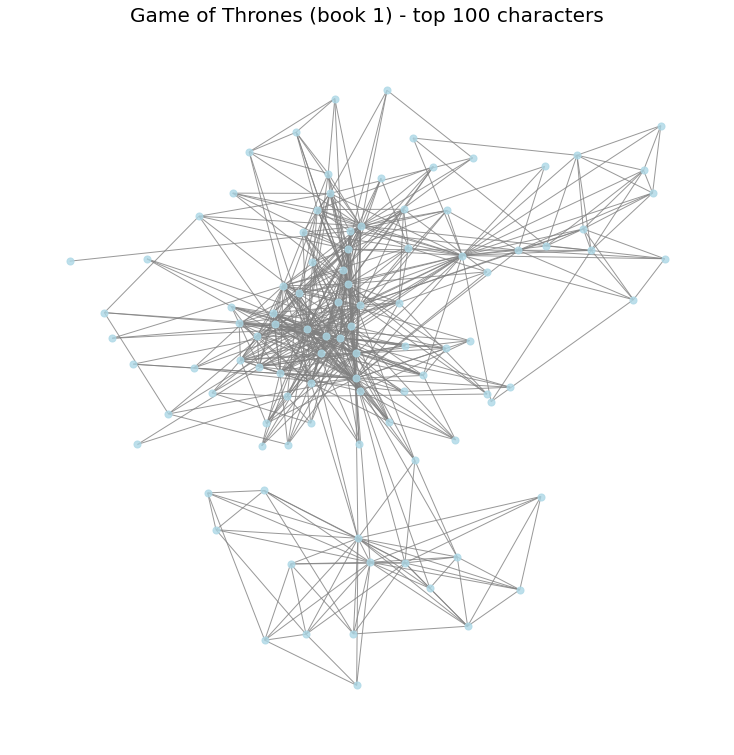

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import csv  

NAZWA_PLIKU = "got-book1.csv"

print(f"Wczytuję plik: {NAZWA_PLIKU}")
edges = []

try:
    with open(NAZWA_PLIKU, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        
        # Pomijamy pierwszą linię (nagłówek: "Source,Target,Weight")
        next(reader)
        for row in reader:
            if row:  # Upewniamy się, że linia nie jest pusta
                src = row[0]
                dst = row[1]
                edges.append((src, dst))

    # Tworzymy pełny graf nieskierowany
    G = nx.Graph()
    G.add_edges_from(edges)

    # -----------------------------------------------------------------
    #  NOWA SEKCJA: Filtrowanie - ograniczenie do 20 najważniejszych postaci
    # -----------------------------------------------------------------
    node_degrees = dict(G.degree())
    
    sorted_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)
    top_20_nodes = sorted_nodes[:100]
    
    # 4. Tworzymy nowy graf 'H' (podgraf), który zawiera TYLKO te 20 wybranych postaci i krawędzie MIĘDZY nimi.
    H = G.subgraph(top_20_nodes)
    
    print("\n--- Informacje o sieci TOP 20 ---")
    print(f"Wybrane postacie: {list(H.nodes())}")
    
    plt.figure(figsize=(10, 10)) 
    
    pos = nx.spring_layout(H, k=0.4, iterations=40, seed=42)

    # Rysujemy 'H'
    nx.draw(H, pos,
            with_labels=False,  # Pokaż etykiety (imiona postaci)
            node_color='lightblue',
            node_size=50,     # Zwiększamy rozmiar węzłów dla czytelności
            font_size=10,
            font_weight='bold',
            edge_color='gray',
            alpha=0.8
           )

    plt.title("Game of Thrones (book 1) - top 100 characters", size=20)
    plt.axis('off')  # Wyłącz osie
    plt.show()

except FileNotFoundError:
    print(f"BŁĄD: Nie znaleziono pliku '{NAZWA_PLIKU}'!")
    print("Upewnij się, że plik znajduje się w tym samym folderze co skrypt.")

1) Real-world networks, like the social web in "Game of Thrones," are not random. They share distinct features:

- Small-World Effect: Networks are highly clustered (friends of your friends are also likely your friends), yet the average distance between any two nodes is surprisingly short (the "six degrees of separation" idea).

- Scale-Free Property (Hubs): Most nodes have very few connections, but a few "hubs" are extremely well-connected (like Eddard Stark or Tyrion, who interact with many people). This is why "top 20" graph is so dense—it's a network of hubs.

- Community Structure: Networks naturally divide into dense groups or "communities" (like families or factions, e.g., House Stark vs. the court at King's Landing) with fewer connections linking these groups together.